In [27]:
from keras.applications.vgg19 import VGG19
from keras.models import Sequential
from keras.utils import to_categorical
from keras.layers import Dense, Flatten
from keras.datasets import cifar10
import matplotlib.pyplot as plt
import cv2
import numpy as np

In [28]:
(x_train, y_train),(x_test, y_test) = cifar10.load_data()
print("x_train shape",x_train.shape)

x_train shape (50000, 32, 32, 3)


In [29]:
print("train sample:",x_train.shape[0])

train sample: 50000


In [30]:
numberOfClass = 10
y_train = to_categorical(y_train, numberOfClass)
y_test = to_categorical(y_test, numberOfClass)

In [31]:
input_shape = x_train.shape[1:]

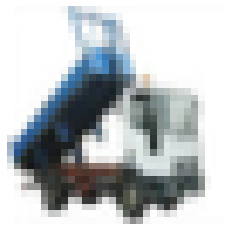

In [32]:
plt.imshow(x_train[5511].astype(np.uint8))
plt.axis("off")
plt.show()

In [33]:
def resize_img(img):
    numberOfImage = img.shape[0]
    new_array = np.zeros((numberOfImage, 48,48,3))
    for i in range(numberOfImage):
        new_array[i] = cv2.resize(img[i,:,:,:],(48,48))
    return new_array

increased dim x_train:  (50000, 48, 48, 3)


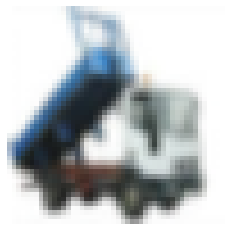

In [34]:
x_train = resize_img(x_train)
x_test = resize_img(x_test)
print("increased dim x_train: ",x_train.shape)

plt.figure()
plt.imshow(x_train[5511].astype(np.uint8))
plt.axis("off")
plt.show()

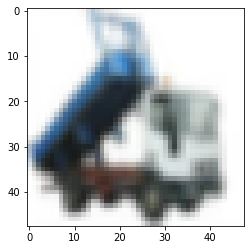

In [35]:
plt.figure()
plt.imshow(x_train[5511].astype(np.uint8))
plt.show()

In [36]:
vgg = VGG19(include_top = False, weights = "imagenet", input_shape = (48,48,3))

print(vgg.summary())

Model: "vgg19"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_3 (InputLayer)         [(None, 48, 48, 3)]       0         
_________________________________________________________________
block1_conv1 (Conv2D)        (None, 48, 48, 64)        1792      
_________________________________________________________________
block1_conv2 (Conv2D)        (None, 48, 48, 64)        36928     
_________________________________________________________________
block1_pool (MaxPooling2D)   (None, 24, 24, 64)        0         
_________________________________________________________________
block2_conv1 (Conv2D)        (None, 24, 24, 128)       73856     
_________________________________________________________________
block2_conv2 (Conv2D)        (None, 24, 24, 128)       147584    
_________________________________________________________________
block2_pool (MaxPooling2D)   (None, 12, 12, 128)       0     

In [37]:
vgg_layer_list = vgg.layers
print(vgg_layer_list)

model = Sequential()
for layer in vgg_layer_list:
    model.add(layer)
    
print(model.summary())

for layer in model.layers:
    layer.trainable = False

# fully con layers
model.add(Flatten())
model.add(Dense(128))
model.add(Dense(numberOfClass, activation= "softmax"))

[<tensorflow.python.keras.engine.input_layer.InputLayer object at 0x000001D4E1043C40>, <tensorflow.python.keras.layers.convolutional.Conv2D object at 0x000001D4E1190C10>, <tensorflow.python.keras.layers.convolutional.Conv2D object at 0x000001D4E10DA4C0>, <tensorflow.python.keras.layers.pooling.MaxPooling2D object at 0x000001D4E1190AC0>, <tensorflow.python.keras.layers.convolutional.Conv2D object at 0x000001D4E17EA910>, <tensorflow.python.keras.layers.convolutional.Conv2D object at 0x000001D4E17F1790>, <tensorflow.python.keras.layers.pooling.MaxPooling2D object at 0x000001D4E17F1E80>, <tensorflow.python.keras.layers.convolutional.Conv2D object at 0x000001D4E17F4AC0>, <tensorflow.python.keras.layers.convolutional.Conv2D object at 0x000001D4E17FC640>, <tensorflow.python.keras.layers.convolutional.Conv2D object at 0x000001D4E18039D0>, <tensorflow.python.keras.layers.convolutional.Conv2D object at 0x000001D4E1809700>, <tensorflow.python.keras.layers.pooling.MaxPooling2D object at 0x000001D4

In [38]:
print(model.summary())

Model: "sequential_3"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
block1_conv1 (Conv2D)        (None, 48, 48, 64)        1792      
_________________________________________________________________
block1_conv2 (Conv2D)        (None, 48, 48, 64)        36928     
_________________________________________________________________
block1_pool (MaxPooling2D)   (None, 24, 24, 64)        0         
_________________________________________________________________
block2_conv1 (Conv2D)        (None, 24, 24, 128)       73856     
_________________________________________________________________
block2_conv2 (Conv2D)        (None, 24, 24, 128)       147584    
_________________________________________________________________
block2_pool (MaxPooling2D)   (None, 12, 12, 128)       0         
_________________________________________________________________
block3_conv1 (Conv2D)        (None, 12, 12, 256)      

In [ ]:
model.compile(loss = "categorical_crossentropy",
              optimizer = "rmsprop",
              metrics = ["accuracy"])

hist = model.fit(x_train, y_train, validation_split = 0.2, epochs = 5, batch_size = 100)

Epoch 1/5
400/400 [==============================] - 1502s 4s/step - loss: 5.2240 - accuracy: 0.4837 - val_loss: 3.2543 - val_accuracy: 0.5228
Epoch 2/5
400/400 [==============================] - 1680s 4s/step - loss: 2.9592 - accuracy: 0.5211 - val_loss: 2.2831 - val_accuracy: 0.5498
Epoch 3/5
400/400 [==============================] - ETA: 0s - loss: 2.2416 - accuracy: 0.5312

In [ ]:
model.save_weight("Vgg19Deneme.h5")

In [ ]:
print(hist.history.keys())
plt.plot(hist.history["loss"], label = "training loss")
plt.plot(hist.history["val_loss"], label = "validation loss")
plt.legend()
plt.show()
plt.figure()
plt.plot(hist.history["accuracy"], label = "training acc")
plt.plot(hist.history["val_accuracy"], label = "validation acc")
plt.legend()
plt.show()

In [ ]:
import tjson, codecs
with open("Vgg19Deneme.json", "w") as f:
    json.dump(hist.history, f)

In [ ]:
with codecs.open("Vgg19Deneme.json", "r", encoding = "utf-8") as f:
    hist = json.loads(f.read())

In [ ]:
print(hist.history.keys())
plt.plot(hist["loss"], label = "training loss")
plt.plot(hist["val_loss"], label = "validation loss")
plt.legend()
plt.show()
plt.figure()
plt.plot(hist["accuracy"], label = "training acc")
plt.plot(hist["val_accuracy"], label = "validation acc")
plt.legend()
plt.show()